In [1]:
# General

import numpy as np
import pandas as pd
import re
import os
import pickle
import random

# EDA

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

#NLP

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import unidecode
import string

[nltk_data] Downloading package punkt to /Users/colinhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colinhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("spam.csv", encoding = 'latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(data.columns[[2,3,4]], axis = 1, inplace = True)
data.columns = ['class','message']
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['no_of_chars'] = data['message'].apply(len)
data['no_of_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['no_of_sentences'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data['no_of_digits'] = data['message'].str.count('\d')
data['no_of_nonwords'] = data['message'].str.count('\W')

data['spam'] = data['class'].map({'ham': 0, 'spam': 1})

data.head()

,class,message,no_of_chars,no_of_words,no_of_sentences,no_of_digits,no_of_nonwords,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,28,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,11,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,33,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,16,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,14,0


### Count plot

In [5]:
temp = pd.DataFrame()
temp['Class'] = ['Ham','Spam']
temp['Count'] = [len(data[data['class'] == 'ham']), len(data[data['class'] == 'spam'])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Class', y = 'Count', 
             color = "Class", text_auto='', width = 600, 
             color_discrete_sequence = ["teal", "gray"],
             template = 'plotly_white',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

## Exploring Number of Characters per Message

In [6]:
fig = px.histogram(data, x = 'no_of_chars', color = 'class', 
                   template = 'plotly_white', 
                   color_discrete_sequence = ["teal", "gray"],
                   title = "Histogram for Ham vs Spam based on Number of Characters per Message",
                   width = 1000)

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

## Exploring Number of Words per Message

In [7]:
fig = px.histogram(data, x = 'no_of_words', color = 'class', 
                   template = 'plotly_white', 
                   color_discrete_sequence = ["teal", "gray"],
                   title = "Histogram for Ham vs Spam based on Number of Words per Message",
                   width = 1000)

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

## Exploring Number of Sentences per Message

In [8]:
fig = px.histogram(data, x = 'no_of_sentences', 
                    color = 'class', template = 'plotly_white', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Histogram for Ham vs Spam based on Number of Sentences per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

## Exploring Number of Digits per Message

In [9]:
fig = px.histogram(data, x = 'no_of_digits', 
                    color = 'class', template = 'plotly_white', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Histogram for Ham vs Spam based on Number of Digits per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

## Exploring Number of Nonwords per Message

In [10]:
fig = px.histogram(data, x = 'no_of_nonwords', 
                    color = 'class', template = 'plotly_white', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Histogram for Ham vs Spam based on Number of Nonwords per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

## Correlation Matrix

In [11]:
corrData = data[["no_of_chars", "no_of_words", "no_of_sentences","no_of_digits","no_of_nonwords"]]
corrData.head()

,no_of_chars,no_of_words,no_of_sentences,no_of_digits,no_of_nonwords
0,111,24,2,0,28
1,29,8,2,0,11
2,155,37,2,25,33
3,49,13,1,0,16
4,61,15,1,0,14


In [12]:

fig = px.imshow(corrData.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_white', title = "Correlation Matrix")
fig.show()

## Word Count

In [14]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(30)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_white', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

In [15]:
word_count_plot(data["message"][data['spam'] == 1], "Word Count Plot Before Stemming (Spam)")

In [16]:
word_count_plot(data["message"][data['spam'] == 0], "Word Count Plot Before Stemming (Ham)")

## Char Count

In [17]:
def char_count_plot(data, title):
    char_counter = Counter([char for sentence in data for char in sentence if (not char.isalnum() and char != ' ')])
    most_count = char_counter.most_common(30)
    most_count = pd.DataFrame(most_count, columns = ['Char', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Char', y = 'Count', color = "Count", text_auto = '', template = 'plotly_white', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

    most_count['Rank'] = most_count['Count'].rank()
    return most_count.set_index('Char')

In [18]:
spam_chars = char_count_plot(data["message"][data['spam'] == 1], "Character Count Plot (Spam)")

In [19]:
ham_chars = char_count_plot(data["message"][data['spam'] == 0], "Char Count Plot (Ham)")

### Stopword Removal & Stemming
#### Stopword
Stopwords are the most common words in any natural language. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.
#### Stemming
An NLP technique which reduces words to their basic form or stem, which may or may not be a legitimate word in the language. This aids in the preprocessing of text, words, and documents for text normalization

In [20]:
corpus = []
ps = SnowballStemmer("english")

for i in range(len(data)):
    # msg = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    msg = data['message'][i]
    msg = re.sub('\d+', ' ', msg)
    msg = msg.lower()
    msg = [word for word in nltk.wordpunct_tokenize(msg) if word.isalpha()]
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

In [ ]:
for sentence in random.sample(corpus, 10):
    print(f"Sentence {corpus.index(sentence)}: {sentence}")

Sentence 727: alright omw gotta chang order half th
Sentence 4475: pick pm go taunton still want come
Sentence 3566: collect valentin weekend pari inc flight hotel å prize guarante text pari www rtf sphost com
Sentence 3817: xmas iscom ur award either å cd gift voucher free entri r å week draw txt music tnc
Sentence 3117: r u say order slipper cos pay return
Sentence 5266: hi darlin kate u doin somethin tonight im go pub call swan someth parent one drink phone u
Sentence 4616: good think could send pix would love see top bottom
Sentence 2545: guy ask get slipper gone last year
Sentence 3152: tag friend seem count friend
Sentence 1595: pls confirm time collect chequ


In [21]:
data['corpus'] = corpus
data

,class,message,no_of_chars,no_of_words,no_of_sentences,no_of_digits,no_of_nonwords,spam,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,28,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,11,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,33,1,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,16,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,14,0,nah think goe usf live around though
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,21,38,1,nd time tri contact u u å pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0,8,0,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,16,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,26,0,guy bitch act like interest buy someth els nex...


In [22]:
store = pd.HDFStore('store.h5')
store['data_stemmed'] = data # save stemmed data
store['data_stemmed'] # load it

,class,message,no_of_chars,no_of_words,no_of_sentences,no_of_digits,no_of_nonwords,spam,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,28,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,11,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,33,1,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,16,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,14,0,nah think goe usf live around though
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,21,38,1,nd time tri contact u u å pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0,8,0,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,16,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,26,0,guy bitch act like interest buy someth els nex...


In [23]:
store.close()

In [24]:
word_count_plot(data['corpus'][data['spam'] == 1], "Word Count Plot After Stemming (Spam)")

In [25]:
word_count_plot(data['corpus'][data['spam'] == 0], "Word Count Plot After Stemming (Ham)")

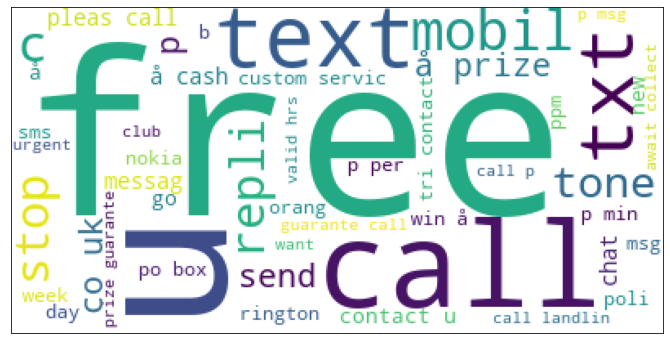

In [26]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(data['corpus'][data['spam'] == 1].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);

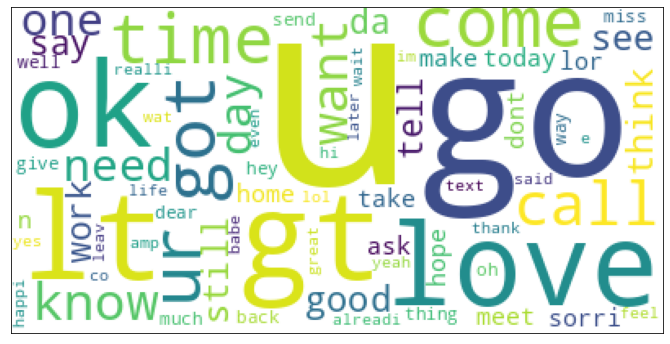

In [ ]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(data['corpus'][data['spam'] == 0].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);